<a href="https://colab.research.google.com/github/imrealhelper/2024-Capstone-Contest/blob/master/ase3001_exercises_segway_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segway control


$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_
_<div style="text-align: right"> Seungyeop Lee (seungyeoplee@inha.edu) </div>_

<br>

---

## Problem Formulation
A Segway is given with the following parameters.

$$
\begin{align*}
&r      &&:\text{the radius of the wheel}\\
&d      &&:\text{the distance from the wheel's center to the center of mass}\\
&\theta &&:\text{The angle of the rod with respect to the y-axis}\\
&\phi   &&:\text{The angle of the wheel with respect to the y-axis}\\
&\tau   &&:\text{The torque applied to the wheel}
\end{align*}
$$







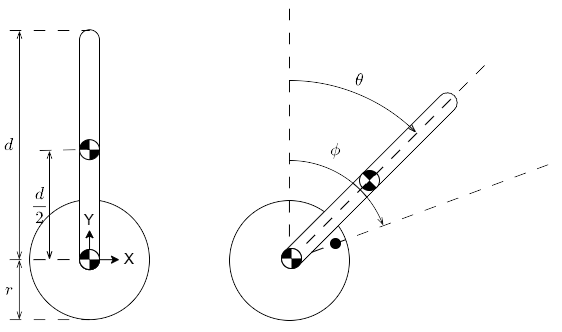

<br>

---

## Segway Dynamic Simulation
We have to implement a dynamic simulation of the given Segway before designing the control systems.

<br>

---

### Segway dynamic model
Ignoring slips of a wheel, the position of the center of a wheel and rod can be calculated as bellow.

$$\;\\
p_{\rm w}=\begin{bmatrix}r\phi \\ 0\end{bmatrix}, \quad p_{\rm r}=\begin{bmatrix}r\phi+{d\over2}\sin{\theta} \\ {d\over2}\cos{\theta}\end{bmatrix}\;\\
$$          

And the velocities are as follows.

$$\;\\
\dot{p}_{\rm w}=\begin{bmatrix}r\dot{\phi} \\ 0\end{bmatrix}, \quad \dot{p}_{\rm r}=\begin{bmatrix}r\dot{\phi}+{d\over2}\dot{\theta}\cos{\theta}\\ -{d\over2}\dot{\theta}\sin{\theta}\end{bmatrix}\;\\
$$          

Now, let's examine the angles $ \phi $ and $ \theta $ of the wheel and the rod. By calculating the energy of the system, including the wheel and the rod, we can use the Euler-Lagrange equation to obtain the model.

The kinetic energy of the wheel and the rod, $ T_{\rm w} $ and $ T_{\rm r} $, consists of both rotational and translational kinetic energy, as follows.

$$\;\\
\begin{align*}
T_{\rm w, rot} &= {1\over2}I_{\rm w}\dot{\phi}^2={1\over2}\Big({1\over2}m_{\rm w}r^2\Big)\dot{\phi}^2\\
T_{\rm w, trn} &= {1\over2}m_{\rm w}(r\dot{\phi})^2\\\\
T_{\rm r, rot} &= {1\over2}I_{\rm r}\dot{\theta}^2={1\over2}\Big({1\over12}m_{\rm r}d^2\Big)\dot{\theta}^2\\
T_{\rm r, trn} &= {1\over2}m_{\rm r}\Big( \Big(r\dot{\phi}+{d\over2}\dot{\theta}\sin{\theta}\Big)^2 + \Big({d\over2}\dot{\theta}\sin{\theta}\Big)^2  \Big)\\\\
\end{align*}\;\\
$$

And the total kinetic energy of the wheel and the rod can be calculated as follows.

$$\;\\
T = T_{\rm w,rot} + T_{\rm w,trn} + T_{\rm r,rot} + T_{\rm r,trn}\;\\
$$

The potential energy of the wheel and the rod is as follows. Since the origin is located on the same horizontal line as the wheel axis, the potential energy of the wheel is zero.

$$\;\\
\begin{align*}
U_{\rm w} &= 0\\
U_{\rm r} &= m_{\rm r}g{d\over2}\cos{\theta}\\
\end{align*}\;\\
$$

Similarly, the potential energy of the wheel and the rod can be calculated as follows.

$$\;\\
U = U_{\rm w} + U_{\rm r}\;\\
$$

The Lagrangian $ L $ is defined as a difference between the two energies as follows.

$$\;\\
L=T-U\;\\
$$

Using this, we can construct the Euler-Lagrange equations as follows. The non-conservative force, torque $ \tau $, acts on the wheel, while the reaction force $ -\tau $ acts on the rod.

$$\;\\
\begin{align*}
{d\over dt}\Big( { \partial L \over \partial \dot{\phi} } \Big) - { \partial L \over \partial {\phi} } &= \tau\\
{d\over dt}\Big( { \partial L \over \partial \dot{\theta} } \Big) - { \partial L \over \partial {\theta} } &= -\tau
\end{align*}\;\\
$$

By expanding and simplifying the above Euler-Lagrange equations, we obtain the following dynamics model for the Segway system.

$$\;\\
\begin{align*}
{ \partial L \over \partial \dot{\phi} } &= ( {3\over2}m_{\rm w}r^2 + m_{\rm r}r^2 ) \dot{\phi} + {1\over2}m_{\rm r}rd\cos{\theta}\dot{\theta}\\
{ \partial L \over \partial {\phi} } &= 0\\
{ \partial L \over \partial \dot{\theta} } &= {1\over3}m_{\rm r}d^2\dot{\theta}+{1\over2}m_{\rm r}rd\cos{\theta}\dot{\theta}\\
{ \partial L \over \partial {\theta} } &= -{1\over2}m_{\rm r}rd\sin{\theta}\dot{\phi}\dot{\theta}+{1\over2}m_{\rm r}dg\sin{\theta}\\\\
\end{align*}
$$

$$
\Rightarrow
\begin{cases}
( {3\over2}m_{\rm w}r^2 + m_{\rm r}r^2 ) \ddot{\phi} + {1\over2}m_{\rm r}rd(-\sin{\theta}\dot{\theta}^2+\cos{\theta}\ddot{\theta})=\tau\\\\
{1\over3}m_{\rm r}d^2\ddot{\theta}+{1\over2}m_{\rm r}rd\cos{\theta}\ddot{\phi}-{1\over2}m_{\rm r}dg\sin{\theta} = -\tau
\end{cases}\\\;\\
$$


$$
\Leftrightarrow
\begin{bmatrix}
{1\over2}m_{\rm r }rd\cos{\theta}& {3\over2}m_{\rm w}r^2 + m_{\rm r}r^2\\
{1\over3}m_{\rm r}d^2&{1\over2}m_{\rm r }rd\cos{\theta}
\end{bmatrix}
\begin{bmatrix}
\ddot{\theta}\\
\ddot{\phi}
\end{bmatrix}=
\begin{bmatrix}
\tau + {1\over2}m_{\rm r}rd\sin{\theta}\dot{\theta}^2\\
-\tau + {1\over2}m_{\rm r}dg\sin{\theta}
\end{bmatrix}
$$

By solving the linear equation above( i.e. $x^*=A^{-1}b$ ), we can obtain the $[\;\ddot\theta \quad \ddot\phi \;]^T$.

Now, let's implement the dynamic model. The state vector $x$ and control input $u$ is defined as follows.

$$
x:=
\begin{bmatrix}
\theta\\
\phi\\
\dot\theta\\
\dot\phi
\end{bmatrix},\quad
u=\tau
$$

With following model,

$$
\dot x=
\begin{bmatrix}
\dot\theta\\
\dot\phi\\
\ddot\theta\\
\ddot\phi
\end{bmatrix}=
\begin{bmatrix}
f_1(x,u)\\
f_2(x,u)\\
f_3(x,u)\\
f_4(x,u)
\end{bmatrix}=
f(x,u)
$$

We can calculate the state of the Segway over time by numerically integrating the differential equation.

$$
x(t) = \int^t_{t_0}f(x,u) dt
$$

In the given code, we can see that the `run_simulation()` function numerically integrates the Segway's dynamic model `segway_dynamics()` through the `propagate_state()` function.

<br>

_**(Problem 1)**_ Complete the `segway_dynamics()` function based on the dynamic model shown above. The `segway_dynamics()` function takes state variables and control inputs as inputs and outputs the state change $ \dot{x} $, effectively functioning as $ \dot x = f(x, u) $.

<br>

_**(Problem 2)**_ Several methods have been introduced for numerical integration, such as the Euler method, the Trapezoidal method, etc. Among them, the Runge-Kutta integration is known as a simple and accurate method. Complete the `propagate_state()` function based on the given 4-th order Runge-Kutta integration given as follows.

$$
x_{k+1} = x_{k} + {1\over6}(K_1+2K_2+2K_3+K_4)\\
\begin{align*}
\text{where, }K_1 &= \Delta t \cdot f(x_{k}, \tau_k)\\
K_2 &= \Delta t \cdot f(x_{k}+K_1/2, \tau_k)\\
K_3 &= \Delta t \cdot f(x_{k}+K_2/2, \tau_k)\\
K_4 &= \Delta t \cdot f(x_{k}+K_3, \tau_k)
\end{align*}
$$




In [2]:
!pip install control

import numpy                as np
import control              as ct
import matplotlib.pyplot    as plt
import matplotlib.animation as animation
from IPython.display        import HTML
g = 9.81

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.0 MB/s eta 0:00:00


In [12]:
class Segway:

  def __init__(self, model_params, simul_params, init_state):

    self.x0       = np.zeros(4)
    self.x0[0]    = init_state  ['rod angle'     ] * np.pi / 180
    self.x0[1]    = init_state  ['wheel angle'   ] * np.pi / 180
    self.x0[2]    = init_state  ['rod velocity'  ] * np.pi / 180
    self.x0[3]    = init_state  ['wheel velocity'] * np.pi / 180

    self.m_w      = model_params['wheel mass'    ]
    self.r        = model_params['wheel radius'  ]
    self.m_r      = model_params['rod mass'      ]
    self.d        = model_params['rod length'    ]
    self.sig_tht  = model_params['imu std'       ]
    self.sig_phid = model_params['encoder std'   ]
    self.alp      = model_params['actuator gain' ]

    self.T        = simul_params['runtime'       ]
    self.dt       = simul_params['time interval' ]

    self.frames   = int(self.T/self.dt)

    self.setpoint = 0


  def run_simulation(self):

    self.x          = self.x0
    self.xhist      = np.zeros((4, self.frames))
    self.pwhist     = np.zeros((2,self.frames))
    self.vwhist     = np.zeros((2,self.frames))
    self.prhist     = np.zeros((2,self.frames))
    self.vrhist     = np.zeros((2,self.frames))
    self.uhist      = np.zeros((1,self.frames))
    self.uchist     = np.zeros((1,self.frames))
    self.thtmhist   = np.zeros((1,self.frames))
    self.phidmhist  = np.zeros((1,self.frames))
    self.thtfhist   = np.zeros((1,self.frames))
    self.phidfhist  = np.zeros((1,self.frames))
    self.thist      = np.linspace(0, self.T, self.frames)

    tht_m   = [self.x[0] ,self.x[0]]
    phid_m  = [self.x[3] ,self.x[3]]
    tht_f   = [self.x[0] ,self.x[0]]
    phid_f  = [self.x[3] ,self.x[3]]
    tau_cmd = [0,0]
    tau     = 0

    self.var1_cum = 0
    self.var2_cum = 0
    self.var3_cum = 0
    self.var4_cum = 0
    self.var5_cum = 0

    for i in range(self.frames):

      self.xhist [:,i]    = self.x
      self.pwhist[:,i]    = self._get_p_w()
      self.prhist[:,i]    = self._get_p_r()
      self.vwhist[:,i]    = self._get_v_w()
      self.vrhist[:,i]    = self._get_v_r()
      self.uchist[:,i]    = tau_cmd[1]
      self.uhist [:,i]    = tau
      self.thtmhist[:,i]  = tht_m[1]
      self.phidmhist[:,i] = phid_m[1]
      self.thtfhist[:,i]  = tht_f[1]
      self.phidfhist[:,i] = phid_f[1]

      phid_f, tht_f = self.filter_1o(phid_f, tht_f, phid_m, tht_m)

      tau_cmd[1] = self.controller(self.setpoint, phid_f, tht_f)

      tau        = self._actuator(tau_cmd, tau)

      self.x = self._propagate_state(f  = self._segway_dynamics,
                                     x  = self.x,
                                     u  = tau,
                                     dt = self.dt)

      tht_m[0]   = tht_m[1]
      tht_m[1]   = self.x[0]  + np.random.randn()*self.sig_tht
      phid_m[0]  = phid_m[1]
      phid_m[1]  = self.x[3]  + np.random.randn()*self.sig_phid
      tau_cmd[0] = tau_cmd[1]

  def filter_1o(self, phid_f, tht_f, phid_m, tht_m):
    return phid_m, tht_m

  def controller(self, setpoint, phid_m, tht_m):
    return 0

  def set_filter_1o(self, filter_1o):
    self.filter_1o = filter_1o

  def set_controller(self, controller):
    self.controller = controller

  def set_setpoint(self, setpoint):
    self.setpoint = setpoint


  def run_static_plot(self):

    self.run_simulation()

    self.fig_stat = plt.figure(figsize=(20,5))
    self.ax_stat_phi   = self.fig_stat.add_subplot(231)
    self.ax_stat_tht   = self.fig_stat.add_subplot(232)
    self.ax_stat_pos   = self.fig_stat.add_subplot(233)
    self.ax_stat_phid  = self.fig_stat.add_subplot(234)
    self.ax_stat_thtd  = self.fig_stat.add_subplot(235)
    self.ax_stat_posd  = self.fig_stat.add_subplot(236)

    self.ax_stat_phi.set_title('Wheel angle')
    self.ax_stat_tht.set_title('Rod angle')
    self.ax_stat_pos.set_title('Position')

    self.ax_stat_phid.set_title('Wheel angular velocity')
    self.ax_stat_thtd.set_title('Rod angular velocity')
    self.ax_stat_posd.set_title('Velocity')

    self.ax_stat_phid.set_xlabel('time [s]')
    self.ax_stat_thtd.set_xlabel('time [s]')
    self.ax_stat_posd.set_xlabel('time [s]')

    self.ax_stat_phi.set_ylabel('angle [deg]')
    self.ax_stat_tht.set_ylabel('angle [deg]')
    self.ax_stat_pos.set_ylabel('position [m]')
    self.ax_stat_phid.set_ylabel('angular velocity [deg/s]')
    self.ax_stat_thtd.set_ylabel('angular velocity [deg/s]')
    self.ax_stat_posd.set_ylabel('velocity [m/s]')

    self.ax_stat_phi.set_xlim(0,self.T)
    self.ax_stat_tht.set_xlim(0,self.T)
    self.ax_stat_pos.set_xlim(0,self.T)
    self.ax_stat_phid.set_xlim(0,self.T)
    self.ax_stat_thtd.set_xlim(0,self.T)
    self.ax_stat_posd.set_xlim(0,self.T)

    self.ax_stat_phi.set_ylim(-180,180)
    self.ax_stat_tht.set_ylim(-180,180)
    self.ax_stat_pos.set_ylim(-10,30)
    self.ax_stat_phid.set_ylim(-180,180)
    self.ax_stat_thtd.set_ylim(-180,180)
    self.ax_stat_posd.set_ylim(-6,6)

    self.ax_stat_phi.grid(True)
    self.ax_stat_tht.grid(True)
    self.ax_stat_pos.grid(True)
    self.ax_stat_phid.grid(True)
    self.ax_stat_thtd.grid(True)
    self.ax_stat_posd.grid(True)

    self.ax_stat_phi.set_xticklabels([])
    self.ax_stat_tht.set_xticklabels([])
    self.ax_stat_pos.set_xticklabels([])

    self.ax_stat_phi.set_yticks(np.arange(-180,181,90))
    self.ax_stat_tht.set_yticks(np.arange(-180,181,90))
    self.ax_stat_pos.set_yticks(np.arange(-10,31,5))
    self.ax_stat_phid.set_yticks(np.arange(-180,181,90))
    self.ax_stat_thtd.set_yticks(np.arange(-180,181,90))
    self.ax_stat_posd.set_yticks(np.arange(-10,11,5))

    self.ax_stat_tht.plot(self.thist, self.xhist[0]*180/np.pi,        color="black", linestyle="-",  label="True"    )
    self.ax_stat_tht.plot(self.thist, self.thtmhist[0]*180/np.pi,     color="black", linestyle="--", label="Measured")
    # self.ax_stat_tht.plot(self.thist, self.thtfhist[0]*180/np.pi,     color="red",   linestyle="-",  label="Filtered")
    self.ax_stat_phi.plot(self.thist, self.xhist[1]*180/np.pi,        color="black", linestyle="-",  label="True"    )
    self.ax_stat_pos.plot(self.thist, self.pwhist[0],                 color="black", linestyle="-",  label="True"    )
    self.ax_stat_thtd.plot(self.thist, self.xhist[2]*180/np.pi,       color="black", linestyle="-",  label="True"    )
    self.ax_stat_phid.plot(self.thist, self.xhist[3]*180/np.pi,       color="black", linestyle="-",  label="True"    )
    self.ax_stat_phid.plot(self.thist, self.phidmhist[0]*180/np.pi,   color="black", linestyle="--", label="Measured")
    # self.ax_stat_phid.plot(self.thist, self.phidfhist[0]*180/np.pi,   color="red",   linestyle="-",  label="Filtered")
    self.ax_stat_posd.plot(self.thist, self.vwhist[0],                color="black", linestyle="-",  label="True"    )

    self.ax_stat_phi.legend(loc="upper right")
    self.ax_stat_tht.legend(loc="upper right")
    self.ax_stat_pos.legend(loc="upper right")
    self.ax_stat_phid.legend(loc="upper right")
    self.ax_stat_thtd.legend(loc="upper right")
    self.ax_stat_posd.legend(loc="upper right")


  def run_dynamic_plot(self):

    self.run_simulation()

    self.fig_dyn, self.ax_dyn = plt.subplots(figsize=(18, 18/8))
    self.ax_dyn.set_xlim(-10, 30)
    self.ax_dyn.set_ylim(-1, 4)
    self.ax_dyn.set_box_aspect(5/40)
    self.ax_dyn.grid(False)
    self.ax_dyn.set_yticks([])

    self.rod,   = self.ax_dyn.plot([], [], 'o-', lw=3, color="black")
    self.wheel, = self.ax_dyn.plot([], [], '-',  lw=1, color="black")
    self.wheel_marker = self.ax_dyn.scatter([], [], s=50, color="black")

    self._wheel = np.array([[self.r*np.cos(ang), self.r*np.sin(ang)] for ang in np.linspace(0, 2*np.pi, 50)])

    self.time_template = 'time = %.1fs'
    self.time_text = self.ax_dyn.text(0.05, 0.9, '', transform=self.ax_dyn.transAxes)

    anim = animation.FuncAnimation\
      (\
      fig        = self.fig_dyn,
      func       = self._animate,
      init_func  = self._plot_init,
      frames     = self.frames,
      interval   = self.dt*1000,
      blit       =True\
      )

    plt.close()
    return anim


  def _plot_init(self):

    self.rod.set_data([], [])
    self.wheel.set_data([], [])
    self.time_text.set_text('')

    return self.rod, self.wheel, self.time_text


  def _animate(self, i):

    x        = self.xhist[:, i]
    p_w, p_r = self.pwhist[:, i], self.prhist[:, i]

    self.rod.set_data([p_w[0], p_r[0]], [p_w[1], p_r[1]])
    self.wheel.set_data(p_w[0]+self._wheel[:, 0], p_w[1]+self._wheel[:, 1])
    self.wheel_marker.set_offsets(np.c_[0.7*self.r*np.sin(x[1])+p_w[0], 0.7*self.r*np.cos(x[1])+p_w[1]])
    self.time_text.set_text(self.time_template % (i*self.dt))

    return self.rod, self.wheel, self.time_text


  def _segway_dynamics(self, x, u):

    tht       = x[0]
    phi       = x[1]
    tht_dot   = x[2]
    phi_dot   = x[3]
    tau       = u

    x_dot = np.zeros(4)

    # your code here ----------------------------------------------------------#
    # Note. you can access class global parameters with self.~
    x_dot[0] = x[2]
    x_dot[1] = x[3]
    b = np.array([u + 1/2*self.m_r * self.d * self.r * np.sin(tht) * tht_dot**2, -u + 1/2 * self.m_r * self.d*g * np.sin(tht)])
    A = np.array([[1/2 * self.m_r * self.r * self.d * np.cos(tht),3/2 * self.m_w * self.r**2 + self.m_r * self.r**2],
                 [1/3 * self.m_r * self.d **2, 1/2 * self.m_r * self.r * self.d * np.cos(tht)]])
    tired = np.linalg.inv(A) @ b
    x_dot[2] = tired[0]
    x_dot[3] = tired[1]
    # -------------------------------------------------------------------------#
    return x_dot


  def _propagate_state(self, f, x, u, dt):

    # your code here ----------------------------------------------------------#
    # Note. "f" is a function you implemented above( f(x,u) = self._segway_dynamics(x,u) ).
    K_1 = f(x,u) * dt
    K_2 = f(x+K_1/2 , u) * dt
    K_3 = f(x+K_2/2 , u) * dt
    K_4 = f(x+K_3/2 , u) * dt
    #Use ronge-Kutta
    x_propagated = x + 1/6 * (K_1 + 2* K_2 + 2 * K_3 + K_4)
    # -------------------------------------------------------------------------#

    return x_propagated


  def _actuator(self, u_cmd, u_p):

    u_cmd_p = u_cmd[0]
    u_cmd_c = u_cmd[1]

    a0 = self.alp
    a1 = self.alp
    b0 = 2/self.dt + self.alp
    b1 =-2/self.dt + self.alp

    u_c = a0/b0 * u_cmd_c + a1/b0 * u_cmd_p - b1/b0 * u_p

    return u_c


  def _get_p_w(self):

    phi       = self.x[1]

    return np.array([self.r*phi, 0])


  def _get_p_r(self):

    tht       = self.x[0]
    phi       = self.x[1]

    return np.array([self.r*phi+self.d*np.sin(tht), self.d*np.cos(tht)])


  def _get_v_w(self):

    phi_dot   = self.x[3]

    return np.array([self.r*phi_dot, 0])


  def _get_v_r(self):

    tht       = self.x[0]
    tht_dot   = self.x[2]
    phi_dot   = self.x[3]

    return np.array([self.r*phi_dot+0.5*self.d*np.sin(tht)*tht_dot, -0.5*self.d*np.cos(tht)*tht_dot])

<br>

In the Segway model, the wheel and rod masses are set to 1 kg, the wheel radius is 1 m, and the rod length is 3 m. The system is equipped with a wheel encoder to measure the wheel rotation speed $ \dot{\phi} $ and a gyro sensor to measure the tilt angle $ \theta $ of the rod. These measurements can be used to control the Segway's motion.

In [43]:
model_params = \
  {                           # unit
    'wheel mass'    : 1.0,    # [m]
    'wheel radius'  : 1.0,    # [m]
    'rod mass'      : 1.0,    # [m]
    'rod length'    : 3.0,    # [m]
    'imu std'       : 0.0,    # [rad]
    'encoder std'   : 0.0,    # [rad/s]
    'actuator gain' : 100     # [Hz]
  }

simul_params = \
  {
    'runtime'       : 10.0,    # [s]
    'time interval' : 0.05    # [s]
  }

init_state = \
  {
    'wheel angle'   : 0.0,    # [deg]
    'rod angle'     : 45.0,   # [deg]
    'wheel velocity': 0.0,    # [deg/s]
    'rod velocity'  : 0.0     # [deg/s]
  }

segway = Segway(model_params, simul_params, init_state)

<br>

You can simulation its kinematics as following codes.

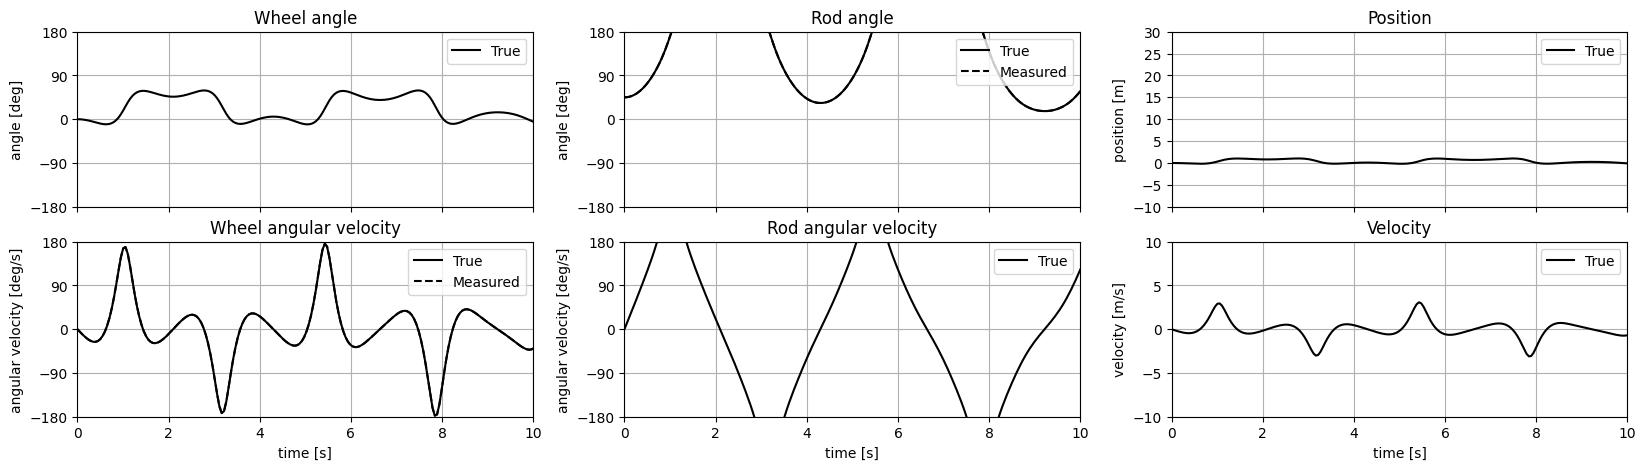

In [44]:
segway.run_static_plot()                         # this shows plots of the state over the time
# HTML(segway.run_dynamic_plot().to_jshtml())     # this shows an animation of the segway. Pretty long time required for rendering ... ( Not recommended for debugging... )

---

<br>

## Segway Controller Design

<br>

### Pendulum balancing control
Let's design a control system to maintain an angle of the Segway's rod. In other words, the control command is the desired rod angle $ \theta_{\rm cmd} $, and the control input is the torque $ \tau $ applied to the wheel.

To design the controller, we need to obtain the relationship between the wheel torque $ \tau $ and the rod angle $ \theta $, i.e., the transfer function $ \frac{\theta(s)}{\tau(s)} $, based on the previously modeled Segway dynamics. Since the given model is nonlinear, we need to linearize it to simplify the analysis.

Assuming that $ \theta $ and $ \dot{\theta} $ are sufficiently small, we can simplify the model as follows.

$$\;\\
\approx
\begin{bmatrix}
{1\over2}m_{\rm r }rd& {3\over2}m_{\rm w}r^2 + m_{\rm r}r^2\\
{1\over3}m_{\rm r}d^2&{1\over2}m_{\rm r }rd
\end{bmatrix}
\begin{bmatrix}
\ddot{\theta}\\
\ddot{\phi}
\end{bmatrix}=
\begin{bmatrix}
\tau\\
-\tau + {1\over2}m_{\rm r}dg\theta
\end{bmatrix}\\
\overset{\rm let}{=}
\begin{bmatrix}
m_1 & m_2\\
m_3 & m_4
\end{bmatrix}
\begin{bmatrix}
\ddot{\theta}\\
\ddot{\phi}
\end{bmatrix}=
\begin{bmatrix}
\tau\\
-\tau + b\theta
\end{bmatrix}\;\\
$$

By expanding and simplifying the linearized model, we obtain the following expression.

$$\;\\
\begin{align*}
\begin{bmatrix}
\ddot{\theta}\\
\ddot{\phi}
\end{bmatrix}
&=
\begin{bmatrix}
m_1 & m_2\\
m_3 & m_4
\end{bmatrix}^{-1}
\begin{bmatrix}
\tau\\
-\tau + b\theta
\end{bmatrix}\\
&={1\over m_1m_4-m_2m_3}
\begin{bmatrix}
(m_2+m_4)\tau - m_2b\theta\\
-(m_1+m_3)\tau + m_1b\theta
\end{bmatrix}
\end{align*}\;\\
$$

From the linearized model, the transfer function $ \frac{\theta(s)}{\tau(s)} $ can be obtained as follows.

$$\;\\
\begin{align*}
\ddot{\theta}&={1\over m_1m_4-m_2m_3}\Big((m_2+m_4)\tau - m_2b\theta\Big)\\\\
\Rightarrow &G_{\theta}(s):={\theta(s)\over\tau(s)}={m_2+m_4 \over (m_1m_4-m_2m_3)s^2+m_2b}
\end{align*}\;\\
$$

And let’s assume that the actual torque $ \tau $ has a first-order delay relationship with the torque command $ \tau_{\rm cmd} $, given as follows.

$$
G_{\tau}(s) = {\alpha_{\tau} \over s + \alpha_{\tau}}
$$

For the plant described above, adding a PD controller to track the angle command $ \theta_{\rm cmd} $, the control system can be configured as follows.

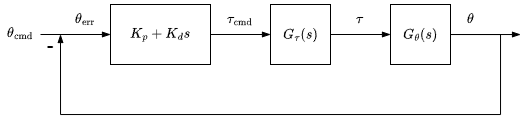

Now, let's analyze the stability of the control system. We can express the system as a product of the gain and the transfer function, as follows.

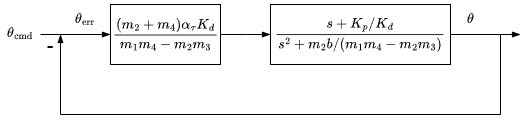

By plotting the root locus of this transfer function, we can observe the locations of the closed-loop poles as a function of the defined gain $K$, as follows.

$$
K:=
\displaystyle
{(m_2 + m_4)\alpha_\tau K_d \over
m_1m_4 - m_2m_3}
$$

The root locus will show that the PD controller has the effect of adding a zero at $(-K_p/K_d,0)$ in the root locus. This added zero influences the trajectory of the poles, improving the system's performance. Specifically, this zero helps to adjust the locations of the poles for better stability and responsiveness, ensuring the system reaches the desired response more quickly and accurately.

<br>

_**(Problem 3)**_ With given transfer function in the block diagram, draw the root locus of it.

$$
G(s)={s + K_p/K_d \over s^2 + m_2b/(m_1m_4 - m_2m_3)}
$$

( Note. Use `ct.rlocus()` function. )

/usr/local/lib/python3.10/dist-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


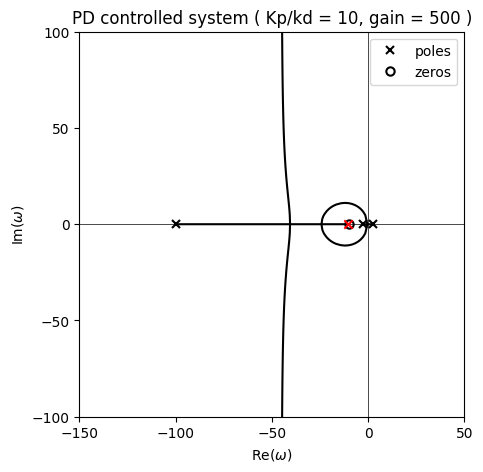

In [212]:
# @title
m_1 = 1/2 * segway.m_r * segway.r * segway.d
m_2 = 3/2 * segway.m_w * segway.r**2 + segway.m_r * segway.r**2
m_3 = 1/3 * segway.m_r * segway.d**2
m_4 = 1/2 * segway.m_r * segway.r * segway.d
b   = 1/2 * segway.m_r * segway.d * g
alp = 100

det_M = m_1*m_4 - m_2*m_3

# Note. you can adjust the gain and Kp/Ki for better pole placement

Kp_frac_Kd  = 10
gain        = 500

# your code here --------------------------------------------------------------#
num = np.array([alp,alp*Kp_frac_Kd])
den = np.convolve(np.array([1,alp]),np.array([1,0,m_2*b/(det_M )]))

#------------------------------------------------------------------------------#

G   = ct.tf(num, den)

fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111)

ct.rlocus(G, ax=ax, title=r"Root locus for $H(s)=G_\tau(s)G_\theta(s)G_c(s)$", color="k")

ax.set_title(f"PD controlled system ( Kp/kd = {Kp_frac_Kd}, gain = {gain} )")
ax.set_xlabel(r"Re$(\omega)$")
ax.set_ylabel(r"Im$(\omega)$")
ax.set_xticks(np.arange(-200, 201, 50))
ax.set_yticks(np.arange(-200, 201, 50))
ax.set_xlim([-150, 50])
ax.set_ylim([-100, 100])
ax.hlines(0, -150, 50, color="k", linewidth=0.5)
ax.vlines(0, -100, 100, color="k", linewidth=0.5)
ax.set_box_aspect(1)

poles, _ = ct.rlocus(G, gains=gain, plot=False)
ax.scatter(poles.real, poles.imag, color="r", marker="x", zorder=10, label="sd")
ax.legend(["poles","zeros"])
plt.show()

In the root locus, the poles marked in red represent the positions of the poles at a specific gain. By adjusting the gain, we can find the appropriate position for the poles. Once the desired pole locations are identified, the corresponding gains can be determined, and the PD controller's $ K_p $ and $ K_d $ values can be set accordingly to achieve the desired system performance.

$$\;\\
\begin{align*}
K_d^*&=
\displaystyle
{m_1m_4 - m_2m_3 \over (m_2 + m_4)\alpha_\tau }
\cdot K^*\\\\
K_p^*&=
{(K_p / K_d)} \cdot K_d^*
\end{align*}\;\\
$$

<br>

_**(Problem 4)**_ Implement the PD controller with the gains determined from the root locus as shown above.

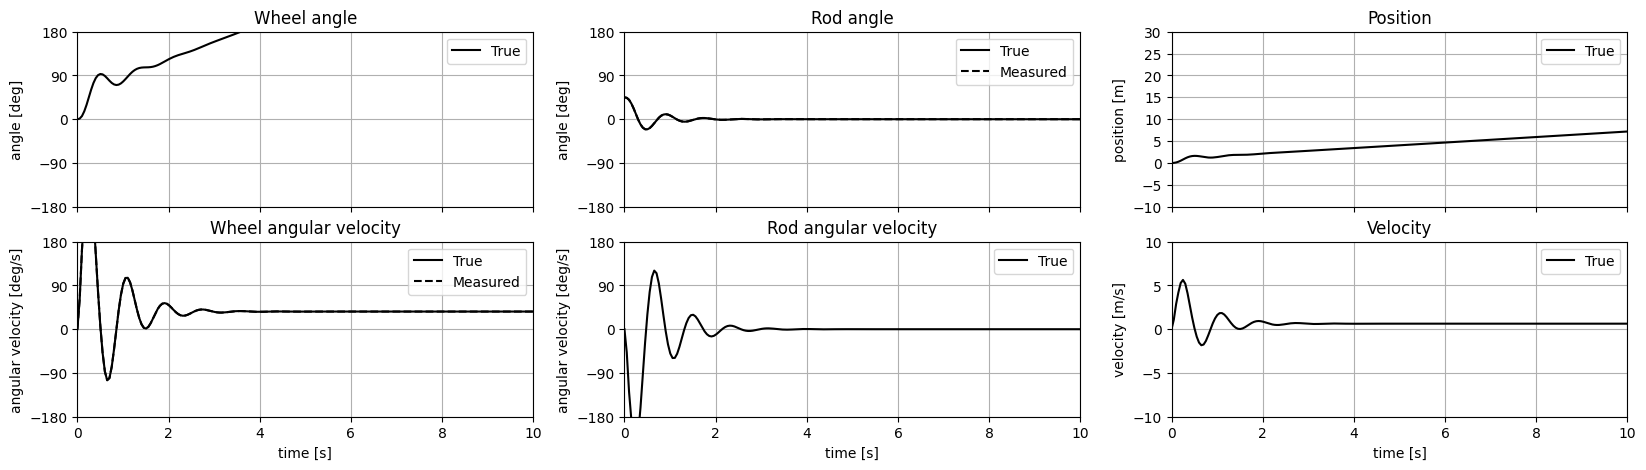

In [213]:
def tht_controller(setpoint, phid_m, tht_m):

  phid_m_p = phid_m[0]    # previous measurement of wheel angular velocity (phi dot)
  phid_m_c = phid_m[1]    # current  measurement of wheel angular velocity (phi dot)
  tht_m_p  = tht_m[0]     # previous measurement of rod angle (theta)
  tht_m_c  = tht_m[1]     # current  measurement of rod angle (theta)
  tht_cmd  = setpoint     # control  setpoint   :   rod angle (theta)






  # your code here ------------------------------------------------------------#
  # Note. you can use a global cumulative variable (segway.var1_cum) if you need
  #       ( is initialized to 0 )

  # Note. if you need to use parameters of segway class, you can access it by follows
  #       ( ex) segway.dt )
  error_tht = tht_cmd - tht_m_c
  K_D_star = (det_M / ((m_2+m_4) * alp)) * gain
  #Now We can use PD control
  K_P_star = Kp_frac_Kd * K_D_star
  u = K_P_star  * error_tht + K_D_star * (tht_m_p-tht_m_c)/segway.dt
  #----------------------------------------------------------------------------#
  return u

segway.set_controller(tht_controller)   # update the controller
segway.set_setpoint(np.deg2rad(0))      # update the control setpoint ( tht_cmd = 0 deg )

segway.run_static_plot()

In [196]:
anim   = segway.run_dynamic_plot()
HTML(anim.to_jshtml())

---

<br>

### Segway speed control
Next, let's design the controller for controlling the speed of the Segway. As mentioned earlier, when slip is neglected, the relationship between the wheel speed and the wheel's angular velocity is given by

$$
\dot{p}_{\rm w}=r\dot{\phi}
$$

In other words, speed control is essentially the same as controlling the wheel's angular velocity. The linearized dynamics of the wheel's angular velocity had been obtained as follows.

$$\;\\
\begin{align*}
\ddot{ϕ}
&=
{1\over m_1m_4-m_2m_3}
(-(m_1+m_3)\tau + m_1b\theta)
\end{align*}\;\\
$$

However, upon closer inspection, we can see that $\ddot{\phi}$ depends on both $\tau$ and $\theta$. This type of system, known as a multi-input single-output (MISO) system, is difficult to analyze using methods like root locus, as we have done previously. (if you try with a simple classical controller, you will quickly realize that it is quite challenging.) Therefore, it is necessary to use a more convenient method for analysis.

One of the methods we can apply is Linear quadratic regulator (LQR), which is based on linear model defined with state space. First, let's define a state vector as follows.

$$
x:=
\begin{bmatrix}
\theta\\
\dot\theta\\
\dot\phi
\end{bmatrix}$$

With the $x$, we can represent the linearized model as follows.

$$
\begin{align*}
\dot x &=
\begin{bmatrix}
\dot\theta\\
\ddot\theta\\
\ddot\phi
\end{bmatrix}=
\underset{A}
{
\begin{bmatrix}
0 & 1 & 0 \\
-{m_2b\over m_1m_4-m_2m_3}&0&0\\
{m_1b\over m_1m_4-m_2m_3}&0&0
\end{bmatrix}
}
\underset{x}
{
\begin{bmatrix}
\theta\\
\dot\theta\\
\dot\phi
\end{bmatrix}
}+
\underset{B}
{
\begin{bmatrix}
0\\
{m_2+m_4\over m_1m_4-m_2m_3}\\
-{m_1+m_3\over m_1m_4-m_2m_3}
\end{bmatrix}
}
\tau
\end{align*}
$$

By using state-space representation, we can reduce the dimensionality, resulting in a more compact form of the equations.



LQR (Linear Quadratic Regulator) is an optimal control technique that calculates the control input $ u $ to minimize the following objective function, while satisfying the dynamics $ \dot{x} = Ax + Bu $.

$$
J = \int^\infty_{0} ( x^TQx + u^TRu )dt
$$

Matrices $ Q $ and $ R $ are weighting matrices, which are user-defined parameters that determine the degree of state regulation and control effort conservation, respectively.

The optimal control input for this LQR problem is given as follows.

$$\\\;\\
u^* = -K^*x\\\;\\
\begin{align*}
\text{where, }
K^* &= R^{-1} B^T P^*,\\
P^*&\text{ is a solution of Riccati equation :}\\
    &A^T P + P A - P B R^{-1} B^T P + Q = 0
\end{align*}\\\;\\
$$

Now, let’s apply this LQR control to our problem. Our goal is to control the wheel rotational speed, $\dot{\phi}$, so that it matches the command speed $\dot{\phi}_{\rm cmd}$. In other words, we want to regulate the error $\dot{\phi} - \dot{\phi}_{\rm cmd}$ to zero. Therefore, let’s define the error variable as follows.

$$
x_{\rm err}:=x-x_{\rm cmd}=
\begin{bmatrix}
\theta\\
\dot\theta\\
\dot\phi - \dot\phi_{\rm cmd}
\end{bmatrix}\\
\downarrow\\
\dot x_{\rm err} = Ax_{\rm err} + Bu
$$

And since we only want to control $\dot{\phi}_{\text{err}}$, we can define the weighting matrix to focus solely on $\dot{\phi}_{\text{err}}$ as follows.

$$\\\;\\
Q=
\begin{bmatrix}
0&0&0\\
0&0&0\\
0&0&0.5
\end{bmatrix}\\\;\\
$$

$$
R = 1
$$

$$
C = I^{3*3}
$$

$$
D = I^{3*3}
$$

Additionally, increasing $R$ results in less control input usage, making the response slower, while decreasing $R$ allows for more liberal use of control input, leading to a higher responsiveness in the controller.

Once the LQR problem is solved and the optimal gain $ K^* $ is obtained, the optimal control input $ u^* $ can be computed as follows:

$$
u^* = -K^*x_{\rm err}
$$

<br>

_**(Problem 5)**_ Complete the linear model $A,B,C,D$ and the LQR gain $Q,R$ in the code below.

( Note. Although $R $ is a scalar, it should be passed as a (1, 1) matrix when input into the function. )

In [209]:
# your code here --------------------------------------------------------------#
# Note. you can use m_1,...m_4, det_M defined above


A= np.array([[0,1,0],[-(m_2 * b)/(det_M),0,0],[m_1*b/(det_M),0,0]])
B = np.array([0,(m_2+ m_4)/ det_M , -(m_1 + m_3)/det_M])
Q = np.zeros([3,3])
Q[-1,-1] = 0.5
C  = np.eye(3)
D = np.zeros([3,1])
D[0]=1
R = np.array([[1]])
# -----------------------------------------------------------------------------#

sys = ct.ss(A,B,C,D)

K, S, E = ct.lqr(sys, Q, R)

print("Optimal gain : ", K)

Optimal gain :  [[-20.46990689  -8.16884702  -0.70710678]]


<br>

_**(Problem 6)**_ Implement a velocity controller using these optimal gains.

( Hint. The $ \dot{\theta} $ is not a directly measurable variable. However, we can calculate it by numerically differentiating the measurable variable $ \theta $. )

<ipython-input-12-7079167b0a38>:259: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_dot[2] = tired[0]
<ipython-input-12-7079167b0a38>:260: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_dot[3] = tired[1]
<ipython-input-12-7079167b0a38>:255: RuntimeWarning: overflow encountered in scalar power
  b = np.array([u + 1/2*self.m_r * self.d * self.r * np.sin(tht) * tht_dot**2, -u + 1/2 * self.m_r * self.d*g * np.sin(tht)])
<ipython-input-12-7079167b0a38>:307: RuntimeWarning: invalid value encountered in sin
  return np.array([self.r*phi+self.d*np.sin(tht), self.d*np.cos(tht)])
<ipython-input-12-7079167b0a38>:307: RuntimeWarning: invalid value 

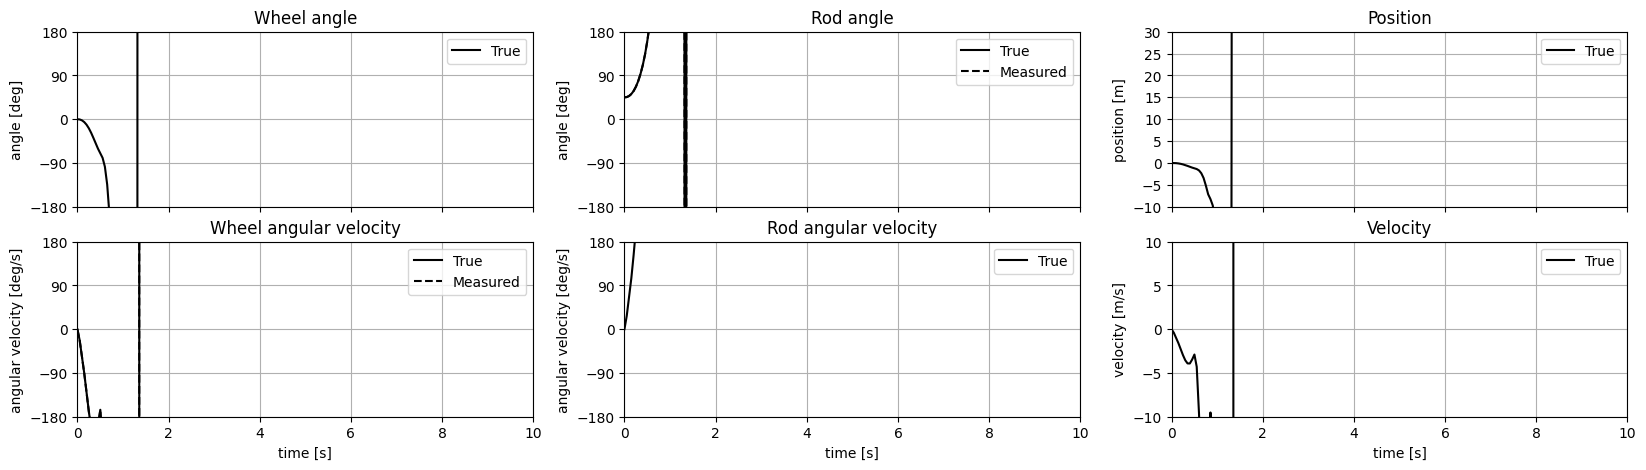

In [219]:
def v_controller(setpoint, phid_m, tht_m):

  phid_m_p = phid_m[0]    # previous measurement of wheel angular velocity (phi dot)
  phid_m_c = phid_m[1]    # current  measurement of wheel angular velocity (phi dot)
  tht_m_p  = tht_m[0]     # previous measurement of rod angle (theta)
  tht_m_c  = tht_m[1]     # current  measurement of rod angle (theta)
  v_cmd    = setpoint     # control  setpoint   :    velocity
  phid_cmd = v_cmd / segway.r


  # your code here ------------------------------------------------------------#
  # Note. you can use a global cumulative variable (segway.var2_cum) if you need
  #       ( is initialized to 0 )

  # Note. if you need to use parameters of segway class, you can access it by follows
  #       ( ex) segway.dt )
  x_err =  np.array([tht_m_c,(tht_m_c-tht_m_p)/segway.dt ,-phid_cmd+phid_m_c ])
  u = K@x_err





  #----------------------------------------------------------------------------#
  return u

segway.set_controller(v_controller)     # update the controller
segway.set_setpoint(3)                  # update the control setpoint ( v_cmd = 3 m/s )

segway.run_static_plot()

In [ ]:
anim   = segway.run_dynamic_plot()
HTML(anim.to_jshtml())

---

<br>

### Pendulum balancing control for noisy measurements

Now, let's examine the case where noise is mixed into the measurements. Let's assume that the IMU and encoder measurements are each affected by Gaussian noise with variances $\sigma_{\rm IMU}^2=0.3^2\; {\rm rad^2}$ and $\sigma_{\rm enc}^2 =0.3^2 \;{\rm (rad/s)^2}$, respectively.

In [ ]:
segway.sig_tht  = 0.3
segway.sig_phid = 0.3

segway.set_controller(tht_controller)   # update the controller
segway.set_setpoint(np.deg2rad(0))      # update the control setpoint ( tht_cmd = 0 deg )

The results with noise included are as follows.

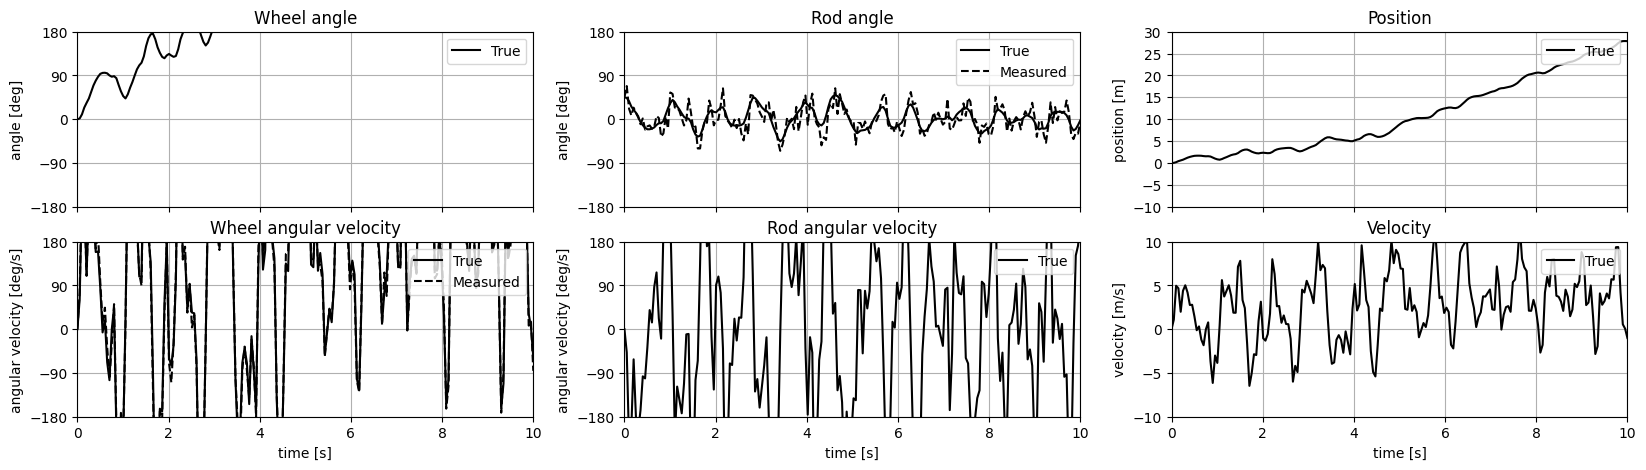

In [ ]:
def filter_1o(phid_f, tht_f, phid_m, tht_m): return phid_m, tht_m

segway.set_filter_1o(filter_1o)

segway.run_static_plot()

The most basic filter is the first-order filter, which is defined as follows.

$$
F(s) = { K_f \over \tau_f s + 1}
$$

<br>

_**(Problem 7)**_ Implement the first-order filter. And simulate with $K_f=1,\tau_f=0.003$.**

( Note. Refer to the appendix. It is normal for the result with the filter to be similar to or slightly worse than the result without the filter. )

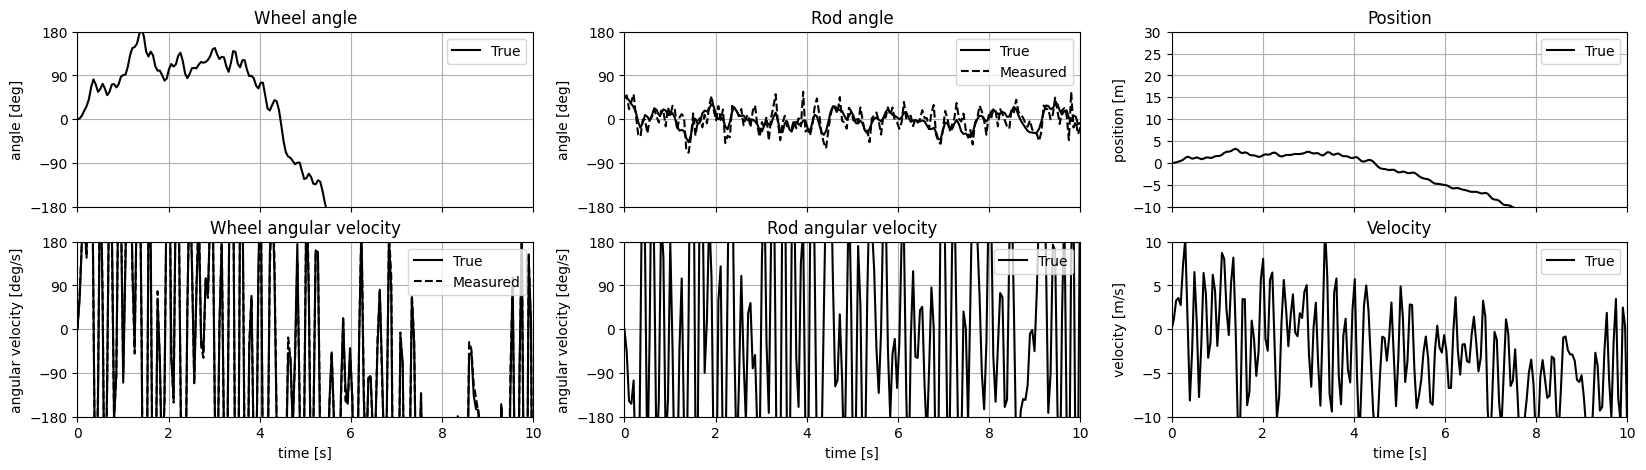

In [ ]:
def filter_1o(phid_f, tht_f, phid_m, tht_m):
  phid_m_p = phid_m[0]    # previous measurement of wheel angular velocity (phi dot)
  phid_m_c = phid_m[1]    # current  measurement of wheel angular velocity (phi dot)
  tht_m_p  = tht_m[0]     # previous measurement of rod angle (theta)
  tht_m_c  = tht_m[1]     # current  measurement of rod angle (theta)
  phid_f_p = phid_f[0]    # previous filtered measurement of wheel angular velocity (phi dot)
  phid_f_c = phid_f[1]    # current  filtered measurement of wheel angular velocity (phi dot)
  tht_f_p  = tht_f[0]     # previous filtered measurement of rod angle (theta)
  tht_f_c  = tht_f[1]     # current  filtered measurement of rod angle (theta)

  # your code here -------------------------------------------------------------#
  # Note. you can use a global cumulative variable (segway.var3_cum) if you need
  #       ( is initialized to 0 )

  # Note. if you need to use parameters of segway class, you can access it by follows
  #       ( ex) segway.dt )





  #-----------------------------------------------------------------------------#

  phid_f[0] = phid_f_c
  phid_f[1] = phid_filtered
  tht_f[0]  = tht_f_c
  tht_f[1]  = tht_filtered

  return phid_f, tht_f

segway.set_filter_1o(filter_1o)
segway.run_static_plot()

As seen in the results, even though a filter is applied, the delay introduced by the filter actually reduces the stability of the control. In such cases, filters that are more robust to delay while still effectively filtering out noise are recommended. Examples of such filters include second-order filters and Kalman filters.

---

<br>

# Appendix


## Eular-Lagrange Equation
A well-known method for general dynamical modeling is Newtonian mechanics, which is based on equations of motion such as $ F = ma $. In contrast, Lagrangian mechanics views the same physical phenomena from the perspective of Hamilton's "least action principle".

The principle of least action states that physical phenomena occur in such a way that the action is minimized. By applying this principle mathematically through variation, which involves changes in the function values based on variations in the independent variables rather than time, we can derive equations that describe physical phenomena.

This equation is known as the Euler-Lagrange equation, which, in the case of conservative forces, takes the following form.

$$
\begin{align*}
{d\over dt}\Big( { \partial L \over \partial \dot{x}_i } \Big) - { \partial L \over \partial x_i } &= 0
\end{align*}
$$

$x$ represents the state variable, and $L$ is the Lagrangian, which is defined as the difference between the kinetic energy $T$ and the potential energy $U$, as follows.

$$
L = T-U
$$

From the above equation, a dynamic model can be derived, and it has the advantage of being simpler to model compared to Newtonian mechanics. This is because Lagrangian mechanics often leads to more straightforward formulations, especially in systems with constraints or complex configurations.


---

<br>

## Z-transform
The dynamic models and controllers introduced above are all defined in continuous time. However, since the data in a computer is digital, the continuous time models and controllers must be "discretized" for implementation in digital systems.

Similar to the $s$-domain, the $z$-domain is a complex plane used for analyzing systems, but it differs in that it is specifically designed for discrete signals. While the $s$-domain handles continuous-time systems and is based on differential equations, the $z$-domain is used to work with difference equations, which govern discrete-time systems.

The transformation from the $s$-domain to the $z$-domain can be done using various methods. One commonly used method, due to its simplicity and minimal error introduced by discretization, is the "bilinear transform". The bilinear transform maps the entire s-plane onto the z-plane and is defined as follows:

$$
s = {2\over T}\cdot{1 - z^{-1} \over 1 + z^{-1}}
$$

where:
- $ s $ is the complex frequency variable in the $s$-domain,
- $ T $ is the sampling period (the inverse of the sampling rate),
- $ z $ is the complex frequency variable in the $z$-domain.

This transformation preserves the stability of the system and maps the left half of the s-plane (which corresponds to stable systems) to the inside of the unit circle in the z-plane. It is widely used because it approximates the continuous-time behavior while keeping the system stable and minimizing the error between the continuous and discrete representations.

Let's take an example. Suppose the following first-order filter transfer function is given, and we will convert it to the $z$-domain.

$$
G(s) = {X_F(s) \over X(s)} = { \alpha \over s + \alpha }
$$

Substituting the previously introduced bilinear transformation relationship between s and z, we get the following.

$$
G(z) = {X_F(z) \over X(z)} =
{
  \alpha z^{-1} + \alpha
  \over
  (\alpha - 2/T) z^{-1} + 2/T + \alpha
}
\overset{\rm let}{=}
{
  a_1 z^{-1} + a_0
  \over
  b_1 z^{-1} + b_0
}
$$


From the transfer function in the $z$-domain, we can derive the relationship between the input and output as follows. The $[n]$ represents the current data at the $n$-th time step, and $[n-1]$ represents the data from one step prior, indicating a 1-step delay.

$$
b_1x_f[n-1]+b_0 x_f[n] = a_1x[n-1]+a_0 x[n]\\
\downarrow\\
x_f[n] = {a_1\over b_0}x[n-1]+{a_0\over b_0} x[n] - {b_1\over b_0} x_f[n-1]
$$


This would be pretty much easier to implement.

<br>

---
